## Loading libraries

In [1]:
import pandas
from scipy import stats
pandas.__version__

'1.3.4'

## Loading the dataset...

I am providing 2 versions of the dataset:
1. `benchmark-dataset-v1.csv` contains 9 runs of the benchmark on 3 different browsers, on the same laptop, with a low workload
2. `benchmark-dataset-v2.csv` contains data from the same browsers and machine, with varying workloads, plus data from 2 browsers on my mobile phone.

In [2]:
# dataset = pandas.read_csv("benchmark-dataset-v1.csv")  # to use homogeneous dataset
dataset = pandas.read_csv("benchmark-dataset-v2.csv") # to use heterogeneous dataset
dataset

,session,run,approach,loop_type,cycles,duration,timestamp,os,browser,useragent
0,feb059,3b066b,Map_Only,async,50,249,2021-12-08T12:54:57.708Z,Windows,Edge,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,feb059,3b066b,Map_Only,sync,50,43,2021-12-08T12:54:57.752Z,Windows,Edge,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,feb059,3b066b,Canvas,async,50,661,2021-12-08T12:54:58.413Z,Windows,Edge,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,feb059,3b066b,Canvas,sync,50,505,2021-12-08T12:54:58.918Z,Windows,Edge,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,feb059,3b066b,HTML_flex,async,50,1784,2021-12-08T12:55:00.702Z,Windows,Edge,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
...,...,...,...,...,...,...,...,...,...,...
187,ef5225,77ac7c,HTML_absolute,sync,50,892,2021-12-08T13:09:48.248Z,Android,Chrome,Mozilla/5.0 (Linux; Android 10; M2010J19SY) Ap...
188,ef5225,77ac7c,SVG_slow,async,50,14074,2021-12-08T13:10:02.322Z,Android,Chrome,Mozilla/5.0 (Linux; Android 10; M2010J19SY) Ap...
189,ef5225,77ac7c,SVG_slow,sync,50,7064,2021-12-08T13:10:09.387Z,Android,Chrome,Mozilla/5.0 (Linux; Android 10; M2010J19SY) Ap...
190,ef5225,77ac7c,SVG,async,50,7812,2021-12-08T13:10:17.200Z,Android,Chrome,Mozilla/5.0 (Linux; Android 10; M2010J19SY) Ap...


### Which approach is the quickest in each condition?

In [3]:
pivoted_data = dataset.pivot(index=['os','browser','run','loop_type'], columns=['approach'], values='duration')
ranked_data = pivoted_data.rank(axis=1)
ranked_data

approach                          Canvas  HTML_absolute  HTML_flex  Map_Only  \
os      browser run    loop_type                                               
Android Chrome  6e84a4 async         2.0            5.0        3.0       1.0   
                       sync          4.0            3.0        2.0       1.0   
                77ac7c async         2.0            5.0        3.0       1.0   
                       sync          5.0            4.0        3.0       1.0   
        Firefox 76a62d async         2.0            3.0        4.0       1.0   
                       sync          2.0            5.0        4.0       1.0   
                808a06 async         2.0            4.0        3.0       1.0   
                       sync          2.0            5.0        4.0       1.0   
Windows Chrome  2401b0 async         2.0            5.0        3.0       1.0   
                       sync          5.0            3.0        4.0       1.0   
                64629d async         2.0            4.0        3.0       1.0   
                       sync          5.0            2.5        2.5       1.0   
                be7cd6 async         2.0            4.0        3.0       1.0   
                       sync          5.0            3.0        2.0       1.0   
                e2725d async         2.0            4.0        3.0       1.0   
                       sync          5.0            3.0        2.0       1.0   
        Edge    3b066b async         2.0            4.0        3.0       1.0   
                       sync          5.0            2.0        3.0       1.0   
                c82f   async         2.0            4.0        3.0       1.0   
                       sync          3.0            4.0        2.0       1.0   
                f8d4de async         2.0            5.0        4.0       1.0   
                       sync          5.0            4.0        3.0       1.0   
                fec968 async         2.0            4.0        3.0       1.0   
                       sync          5.0            3.0        2.0       1.0   
        Firefox 48dd45 async         2.0            4.0        3.0       1.0   
                       sync          4.0            3.0        2.0       1.0   
                4f5908 async         2.0            4.0        3.0       1.0   
                       sync          5.0            4.0        2.0       1.0   
                5b796  async         2.0            4.0        3.0       1.0   
                       sync          5.0            3.0        2.0       1.0   
                c79a07 async         2.0            4.0        3.0       1.0   
                       sync          5.0            3.0        2.0       1.0   

approach                          SVG  SVG_slow  
os      browser run    loop_type                 
Android Chrome  6e84a4 async      4.0       6.0  
                       sync       5.0       6.0  
                77ac7c async      4.0       6.0  
                       sync       2.0       6.0  
        Firefox 76a62d async      6.0       5.0  
                       sync       3.0       6.0  
                808a06 async      5.0       6.0  
                       sync       3.0       6.0  
Windows Chrome  2401b0 async      4.0       6.0  
                       sync       2.0       6.0  
                64629d async      5.0       6.0  
                       sync       4.0       6.0  
                be7cd6 async      5.0       6.0  
                       sync       4.0       6.0  
                e2725d async      5.0       6.0  
                       sync       4.0       6.0  
        Edge    3b066b async      5.0       6.0  
                       sync       4.0       6.0  
                c82f   async      5.0       6.0  
                       sync       5.0       6.0  
                f8d4de async      3.0       6.0  
                       sync       2.0       6.0  
                fec968 async      5.0       6.0  
                       sync  

Interestingly, when benchmark is calculated using an asynchronous loop, SVG ranks lower and Canvas much higher

In [4]:
ranked_data.groupby(level='loop_type').mean()

approach,Canvas,HTML_absolute,HTML_flex,Map_Only,SVG,SVG_slow
loop_type,,,,,,
async,2.000,4.18750,3.12500,1.0,4.875,5.8125
sync,4.375,3.40625,2.59375,1.0,3.625,6.0000


### How much faster is Canvas compared to SVG?

We start by pivoting the data and adding a ratio column

In [5]:
pivoted_data = dataset[dataset.loop_type == "async"].pivot(index=['run'], columns=['approach'], values='duration')
pivoted_data['SVG_Canvas_Ratio'] = pivoted_data.SVG / pivoted_data.Canvas
pivoted_data

approach,Canvas,HTML_absolute,HTML_flex,Map_Only,SVG,SVG_slow,SVG_Canvas_Ratio
run,,,,,,,
2401b0,575,3913,3265,256,3521,11755,6.123478
3b066b,661,2337,1784,249,2381,4922,3.602118
48dd45,787,1699,1665,646,4631,4208,5.884371
4f5908,2863,8299,7947,706,22138,24117,7.732448
5b796,869,2931,2823,736,7236,7994,8.326812
64629d,774,1892,1884,255,2476,5980,3.198966
6e84a4,1337,8161,6296,265,7748,14265,5.795064
76a62d,932,5180,5368,280,10989,10667,11.790773
77ac7c,1249,8184,6428,280,7812,14074,6.254604


approach,Canvas,HTML_absolute,HTML_flex,Map_Only,SVG,SVG_slow,SVG_Canvas_Ratio
count,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000
mean,1198.250000,5976.125000,4552.81250,399.250000,8949.250000,15469.437500,6.720769
std,752.706627,5485.250683,3230.65158,189.940868,8015.402103,16218.628027,2.767908
min,575.000000,1699.000000,1665.00000,249.000000,2381.000000,4055.000000,3.001949
25%,745.750000,2288.250000,1785.50000,263.750000,3296.750000,6129.250000,4.968360
50%,900.500000,4224.000000,3346.00000,287.000000,5933.500000,11008.500000,6.003925
75%,1271.000000,8166.750000,6329.00000,505.000000,10898.250000,14121.750000,8.548807
max,2863.000000,21647.000000,11691.00000,736.000000,25229.000000,56296.000000,11.790773


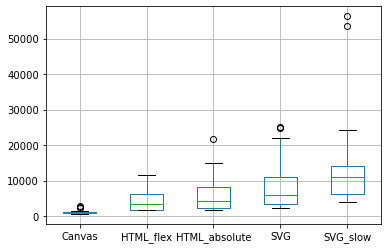

In [6]:
pivoted_data.boxplot(column=['Canvas', 'HTML_flex', 'HTML_absolute', 'SVG', 'SVG_slow'])
pivoted_data.describe()

Let's calculate the 95% confidence interval for the mean of the SVG/Canvas Ratio

(5.245854967396916, 8.195683478001396)

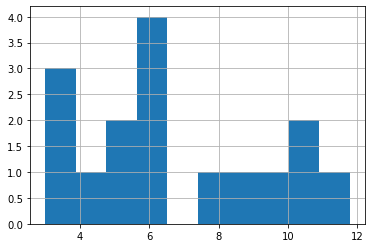

In [7]:
pivoted_data.SVG_Canvas_Ratio.hist()
stats.t.interval(
    alpha=.95, # Confidence level
    df=len(pivoted_data)-1, # Degrees of freedom
    loc=pivoted_data.SVG_Canvas_Ratio.mean(), # Interval around the mean
    scale=stats.sem(pivoted_data.SVG_Canvas_Ratio) # Based on Standard Error of Mean
)

This means that we are **95%** confident that the average ratio between the Canvas and the SVG method is between:
- **3,6** and **5,2 times** in the homogeneous dataset
- **5,2** and **8,2 times** in the heterogeneous dataset

This pre-supposes that the data is normally distributed.

### How significant is the performance difference between methods?

Using a paired-samples T-test

In [8]:
cols = ['HTML_flex', 'HTML_absolute', 'SVG', 'SVG_slow']
for i in range(len(cols)):
    for j in range(i):
        print(cols[i].ljust(15),' vs. ',cols[j],'\n\t',stats.ttest_rel(pivoted_data[cols[i]], pivoted_data[cols[j]]))

HTML_absolute    vs.  HTML_flex 
	 Ttest_relResult(statistic=2.215933052206538, pvalue=0.042579528045401965)
SVG              vs.  HTML_flex 
	 Ttest_relResult(statistic=3.4231835299210536, pvalue=0.003773909680515941)
SVG              vs.  HTML_absolute 
	 Ttest_relResult(statistic=2.8486514953371715, pvalue=0.012199724525630949)
SVG_slow         vs.  HTML_flex 
	 Ttest_relResult(statistic=3.2845983534897423, pvalue=0.005014784540449305)
SVG_slow         vs.  HTML_absolute 
	 Ttest_relResult(statistic=3.43507249826847, pvalue=0.0036829511462710364)
SVG_slow         vs.  SVG 
	 Ttest_relResult(statistic=2.718773687755593, pvalue=0.015850338131205528)


According to the paired sample T-test, all differences are significant. This works very well for the homogeneous dataset because it's all data from the same device under similar conditions and it's close enough to a normal distribution.

Let's also try the **Wilcoxon Sign-Rank test** - some of the p-values on the heterogeneous dataset will be even better.

In [9]:
cols = ['HTML_flex', 'HTML_absolute', 'SVG', 'SVG_slow']
for i in range(len(cols)):
    for j in range(i):
        print(cols[i].ljust(15),' vs. ',cols[j],'\n\t',stats.wilcoxon(pivoted_data[cols[i]], pivoted_data[cols[j]]))

HTML_absolute    vs.  HTML_flex 
	 WilcoxonResult(statistic=5.0, pvalue=0.00030517578125)
SVG              vs.  HTML_flex 
	 WilcoxonResult(statistic=2.0, pvalue=9.1552734375e-05)
SVG              vs.  HTML_absolute 
	 WilcoxonResult(statistic=20.0, pvalue=0.010986328125)
SVG_slow         vs.  HTML_flex 
	 WilcoxonResult(statistic=0.0, pvalue=3.0517578125e-05)
SVG_slow         vs.  HTML_absolute 
	 WilcoxonResult(statistic=0.0, pvalue=3.0517578125e-05)
SVG_slow         vs.  SVG 
	 WilcoxonResult(statistic=6.0, pvalue=0.00042724609375)


### Which browser is faster on Windows?


Browser: Chrome 
 count       48.000000
mean      4811.020833
std       9962.614321
min         16.000000
25%        391.750000
50%       1835.000000
75%       3407.000000
max      56296.000000
Name: duration, dtype: float64

Browser: Edge 
 count       48.000000
mean      4545.666667
std       9495.474755
min         22.000000
25%        409.250000
50%       1732.000000
75%       3176.500000
max      53542.000000
Name: duration, dtype: float64

Browser: Firefox 
 count       48.000000
mean      3018.354167
std       4939.756836
min         28.000000
25%        495.750000
50%       1092.500000
75%       2880.000000
max      24117.000000
Name: duration, dtype: float64


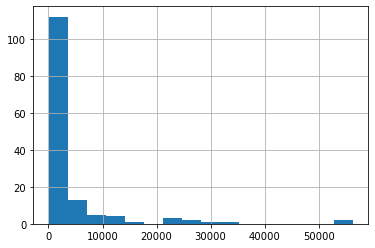

In [11]:
windows_data = dataset[dataset.os == 'Windows']
windows_data.duration.hist(bins=16)
for browser in ['Chrome', 'Edge', 'Firefox']:
    print('\nBrowser:',browser,'\n',windows_data[windows_data.browser == browser].duration.describe())

In [12]:
print("Anova (when data is normally distributed)\n\t", stats.f_oneway(
    windows_data[windows_data.browser == 'Chrome'].duration,
    windows_data[windows_data.browser == 'Edge'].duration,
    windows_data[windows_data.browser == 'Firefox'].duration
))
print("Kruskal-Wallis Test (when it isn't)\n\t", stats.kruskal(
    windows_data[windows_data.browser == 'Chrome'].duration,
    windows_data[windows_data.browser == 'Edge'].duration,
    windows_data[windows_data.browser == 'Firefox'].duration
))

Anova (when data is normally distributed)
	 F_onewayResult(statistic=0.6304493560701709, pvalue=0.5338463908037263)
Kruskal-Wallis Test (when it isn't)
	 KruskalResult(statistic=0.05675965855699408, pvalue=0.9720190953639573)
